In [1]:
import utils
from hopfield import HopfieldNeuralNetwork
import numpy as np
import random
import time
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')

In [2]:
mc = utils.MaxCut()
W = mc.get_adj_matrix('max_cut_data/MaxCut_50_156.txt')
print(W.shape)

# node weights aren't relevant for max-cut, won't contribute in any calculation
W = W - np.diag(np.diag(W))

hnn = HopfieldNeuralNetwork(weights=-W, mode='PowerSmoothing')
n_steps = 500
n_epochs = 100

alpha_evol = np.linspace(0, 1, n_steps) # np.logspace(5, -5, n_steps)
energies = np.zeros((n_epochs, n_steps))
idx_state = utils.PermutationStates(hnn.n_neurons)

def find_cut(hnn, n_steps, epoch, batch_size=0):
  '''`batch_size` lies in [0, 1]. If `batch_size` is 0, a single state of x is updated
  at a time. If `batch_size` is 1, all states of x are updated at a time.'''
  x = np.random.choice([-1, 1], size=hnn.n_neurons)
  for i, alpha in zip(range(n_steps), alpha_evol):
    if batch_size == 0: idx = idx_state.next()
    else: idx = random.sample(range(hnn.n_neurons), int(np.ceil(batch_size*hnn.n_neurons)))
    x[idx] = hnn.predict(x, alpha=alpha, indices=idx)
    energies[epoch][i] = mc.energy(x, hnn.W)
  cut_val = mc.energy(x, hnn.W)
  return cut_val, x

start = time.perf_counter()
best_cut_energy = np.inf
max_cut = None
for e in range(n_epochs):
  cut_val, y = find_cut(hnn, n_steps, e)
  if cut_val < best_cut_energy:
    best_cut_energy = cut_val
    max_cut = y

print(f'Max Cut value: {best_cut_energy}')
print(f'Finished in {time.perf_counter()-start:.2f} seconds')

max_cut_data/MaxCut_50_156.txt
(50, 50)


d:\Desktop\mem-HNNs\sims\hopfield.py:79: RuntimeWarning: invalid value encountered in power
  W_new = self.W_avg + np.where(self.W[self.idx] >= self.W_avg, (self.W[self.idx] - self.W_avg)**alpha, -(self.W_avg - self.W[self.idx])**alpha)


Max Cut value: -1762.0
Finished in 13.99 seconds


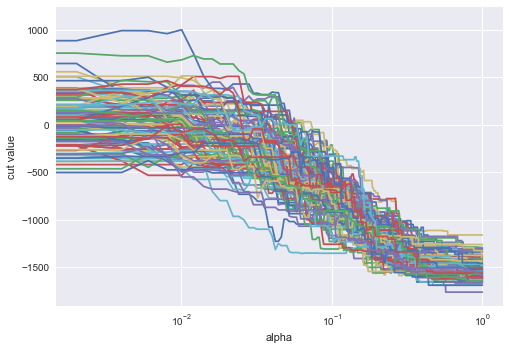

In [3]:
for e in range(n_epochs): plt.plot(alpha_evol, energies[e])
plt.xscale('log')
# plt.gca().invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('cut value')
plt.savefig('cut_values.png')

In [4]:
max_cut

array([ 1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1])

Worst cut value: -1160.0


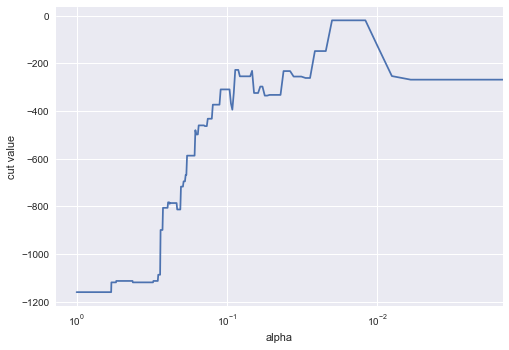

In [5]:
i = np.argmax(energies[:,-1])
print(f'Worst cut value: {energies[i][-1]}')
plt.plot(alpha_evol, energies[i])
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('cut value')
plt.show()

Best cut value: -1762.0


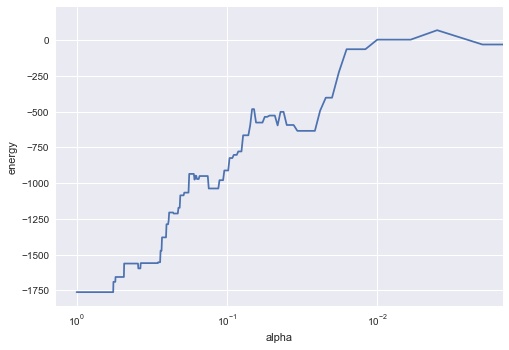

In [6]:
i = np.argmin(energies[:,-1])
print(f'Best cut value: {energies[i][-1]}')
plt.plot(alpha_evol, energies[i])
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('energy')
plt.show()
